# Iris Flower Classification:
<!--  -->The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.


# Download the Iris Dataset

In [1]:
pip install opendatasets 

Note: you may need to restart the kernel to use updated packages.


In [3]:
# path of dataset
dataset_url = 'https://www.kaggle.com/datasets/arshid/iris-flower-dataset'

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zeeooma
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 0.99k/0.99k [00:00<00:00, 338kB/s]

In [5]:
data_dir = '.\iris-flower-dataset'

In [6]:
import os
os.listdir(data_dir)

['IRIS.csv']

# Import the iris dataset

In [7]:
import pandas as pd

In [9]:
iris_df = pd.read_csv(data_dir + '/IRIS.csv')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data preprocessing and Cleaning

In [10]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
iris_df.duplicated().sum()

3

In [15]:
iris_df.drop_duplicates(inplace=True)

In [16]:
iris_df.duplicated().sum()

0

In [18]:
iris_df.shape

(147, 5)

# Data Visualization

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

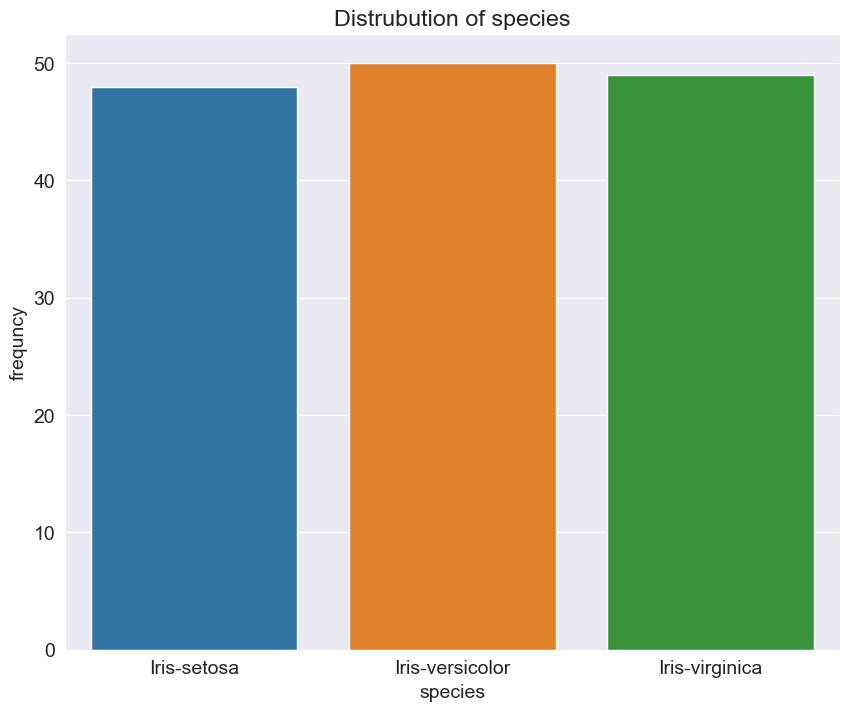

In [25]:
plt.figure(figsize=(10, 8)) 
sns.countplot(data = iris_df, x='species')
plt.title('Distrubution of species')
plt.xlabel('species')
plt.ylabel('frequncy')
plt.show()

C:\Users\AHLp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


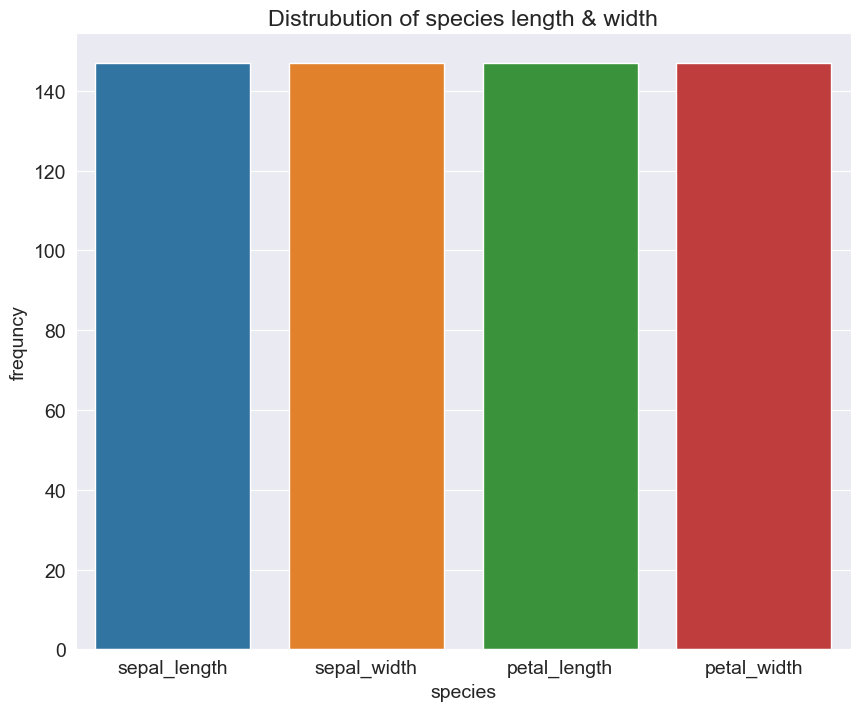

In [107]:
plt.figure(figsize=(10, 8)) 
sns.countplot(data = iris_df, hue_order='species')
plt.title('Distrubution of species length & width')
plt.xlabel('species')
plt.ylabel('frequncy')
plt.show()

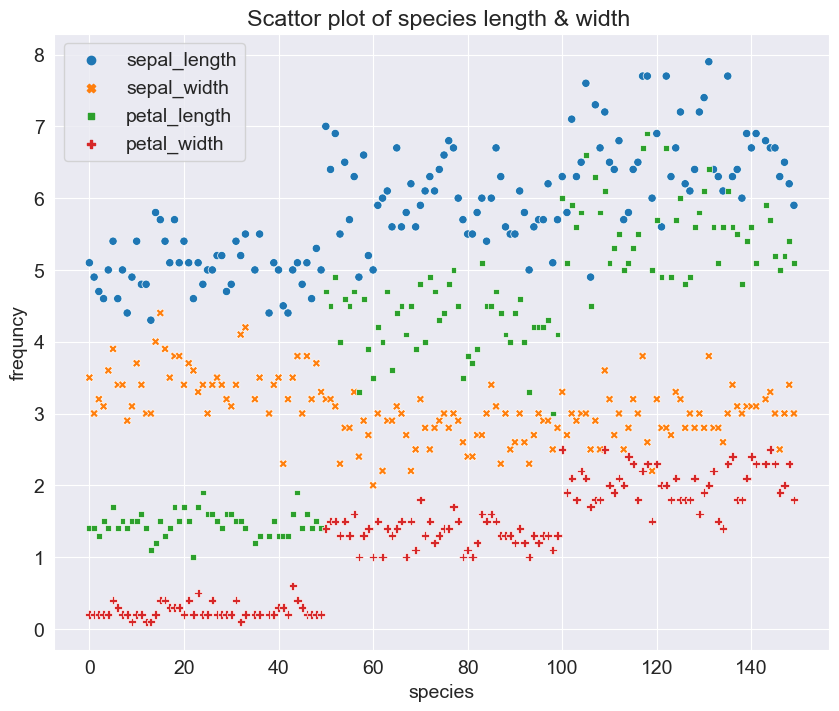

In [108]:
plt.figure(figsize=(10, 8)) 
sns.scatterplot(data = iris_df)
plt.title('Scattor plot of species length & width ')
plt.xlabel('species')
plt.ylabel('frequncy')
plt.show()

Text(0.5, 1.0, 'petal width vs sepal_width by Species')

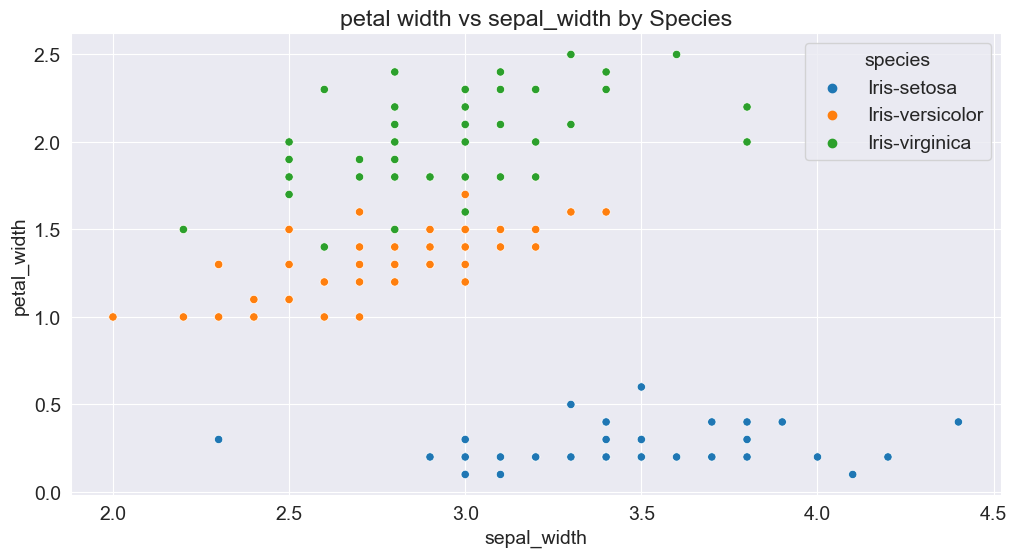

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='sepal_width', y='petal_width', data=iris_df, hue='species');
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title("petal width vs sepal_width by Species")

Text(0.5, 1.0, 'petal width vs sepal_width by Species')

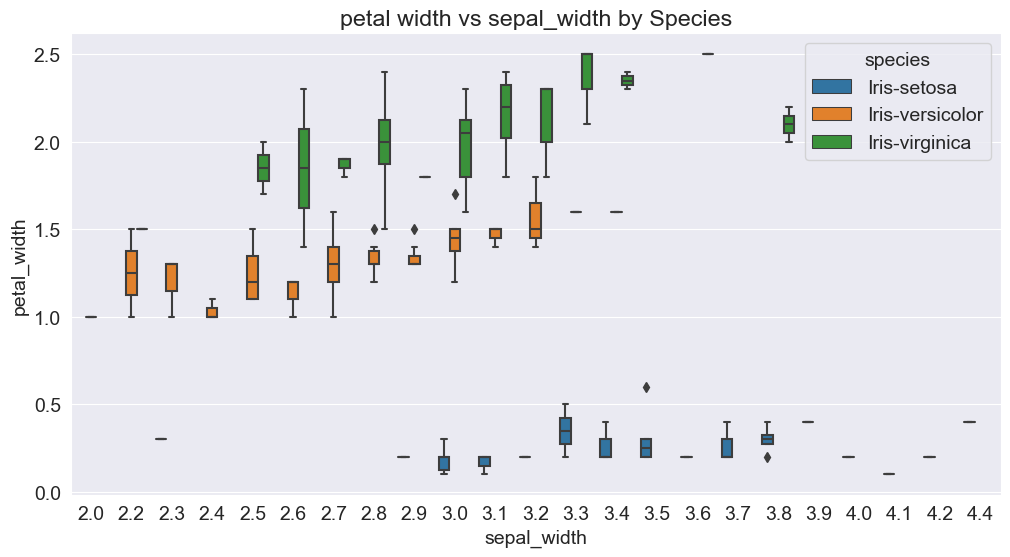

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(x='sepal_width', y='petal_width', data=iris_df, hue='species');
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title("petal width vs sepal_width by Species")

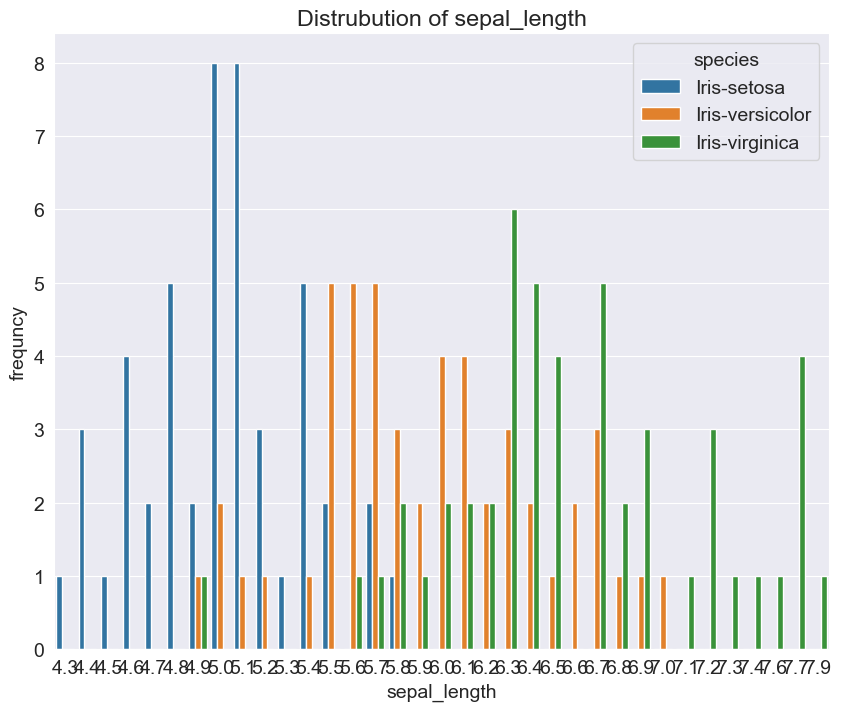

In [26]:
plt.figure(figsize=(10, 8)) 
sns.countplot(data = iris_df, x='sepal_length',  hue='species')
plt.title('Distrubution of sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('frequncy')
plt.show()

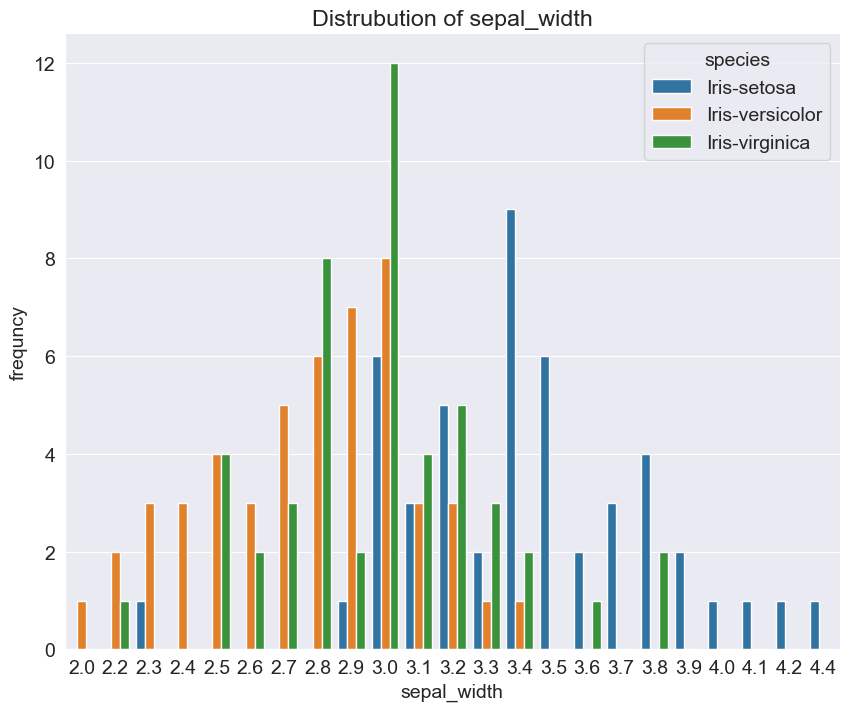

In [27]:
plt.figure(figsize=(10, 8)) 
sns.countplot(data = iris_df, x='sepal_width', hue='species')
plt.title('Distrubution of sepal_width')
plt.xlabel('sepal_width')
plt.ylabel('frequncy')
plt.show()

Text(0.5, 1.0, 'sepal length vs sepal width')

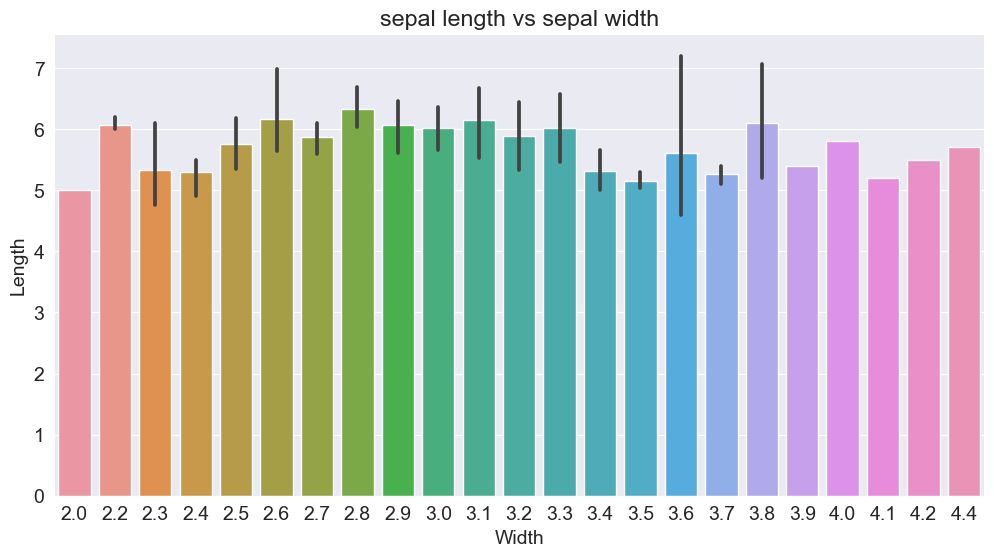

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x='sepal_width', y='sepal_length', data=iris_df)
plt.xlabel('Width')
plt.ylabel('Length')
plt.title("sepal length vs sepal width")

Text(0.5, 1.0, 'sepal length vs sepal width by Species')

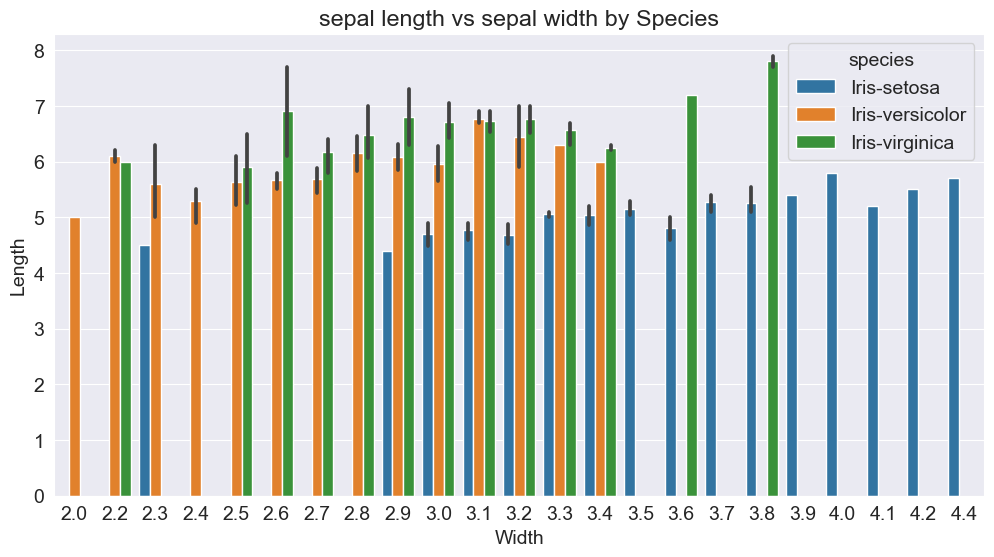

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x='sepal_width', y='sepal_length', data=iris_df, hue='species');
plt.xlabel('Width')
plt.ylabel('Length')
plt.title("sepal length vs sepal width by Species")

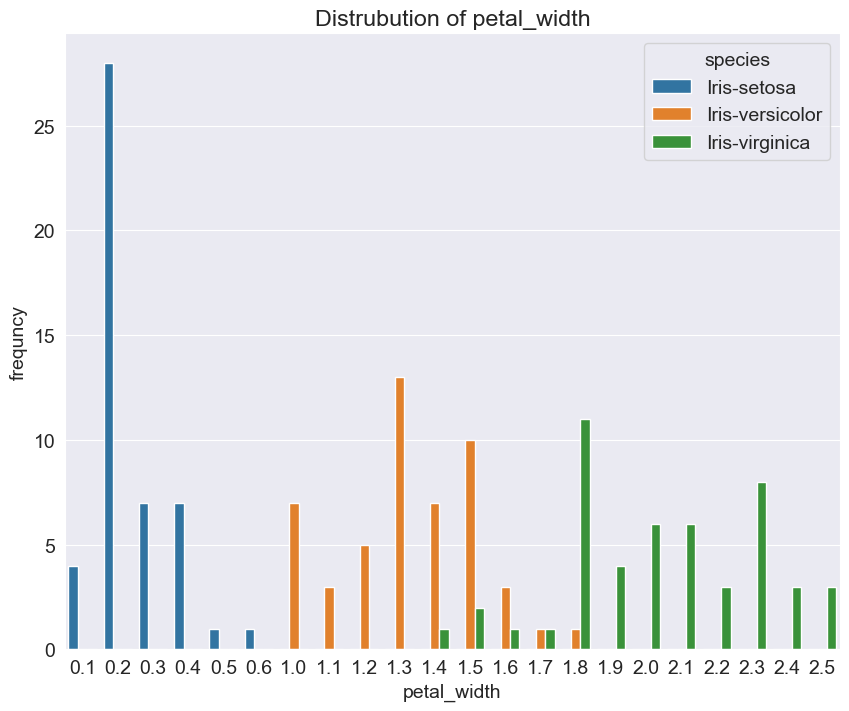

In [30]:
plt.figure(figsize=(10, 8)) 
sns.countplot(data = iris_df, x='petal_width', hue='species')
plt.title('Distrubution of petal_width')
plt.xlabel('petal_width')
plt.ylabel('frequncy')
plt.show()

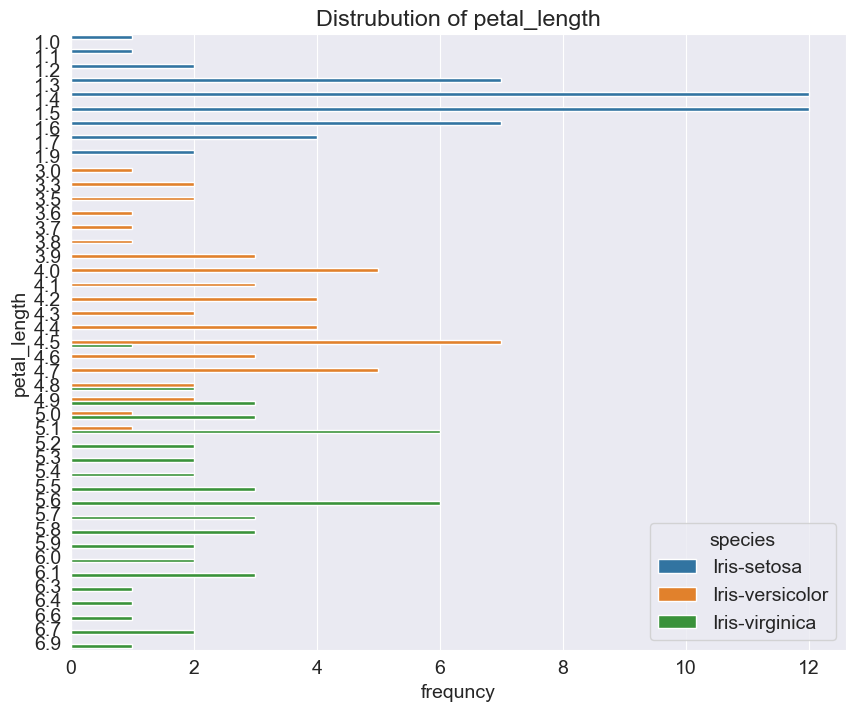

In [33]:
plt.figure(figsize=(10, 8)) 
sns.countplot(data = iris_df, y='petal_length', hue='species')
plt.title('Distrubution of petal_length')
plt.xlabel('frequncy')
plt.ylabel('petal_length')
plt.show()

Text(0.5, 1.0, 'petal length vs sepal width by Species')

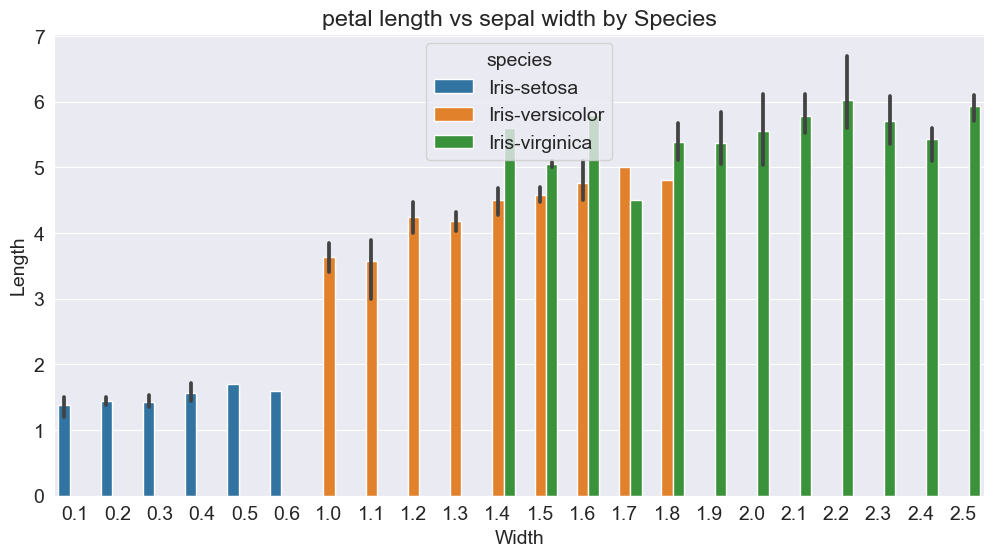

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x='petal_width', y='petal_length', data=iris_df, hue='species');
plt.xlabel('Width')
plt.ylabel('Length')
plt.title("petal length vs sepal width by Species")

Text(0.5, 1.0, 'petal length vs sepal_length by Species')

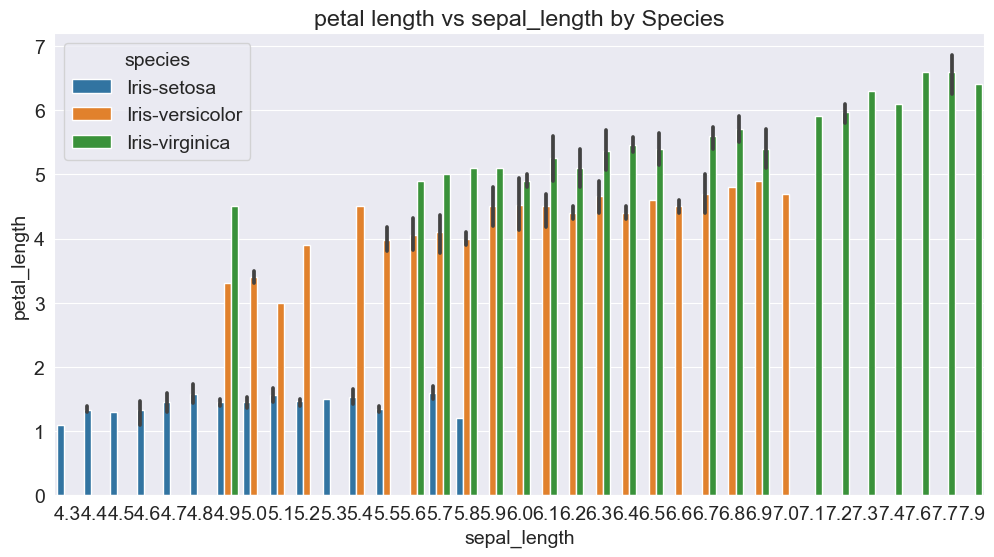

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x='sepal_length', y='petal_length', data=iris_df, hue='species');
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title("petal length vs sepal_length by Species")

Text(0.5, 1.0, 'petal width vs sepal_width by Species')

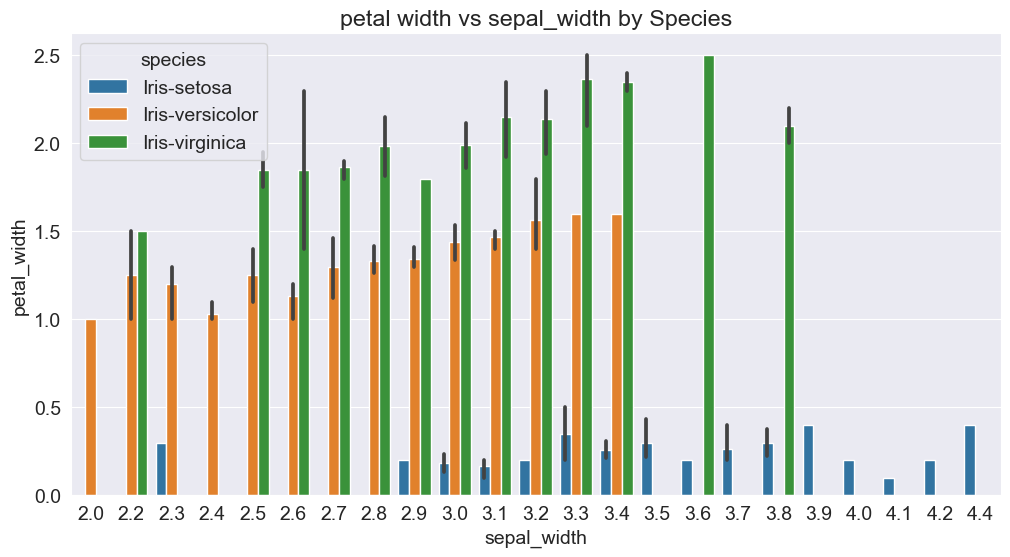

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x='sepal_width', y='petal_width', data=iris_df, hue='species');
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title("petal width vs sepal_width by Species")

C:\Users\AHLp\AppData\Local\Temp\ipykernel_4724\432610408.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(), annot=True, cmap='plasma', linewidths=0.5)


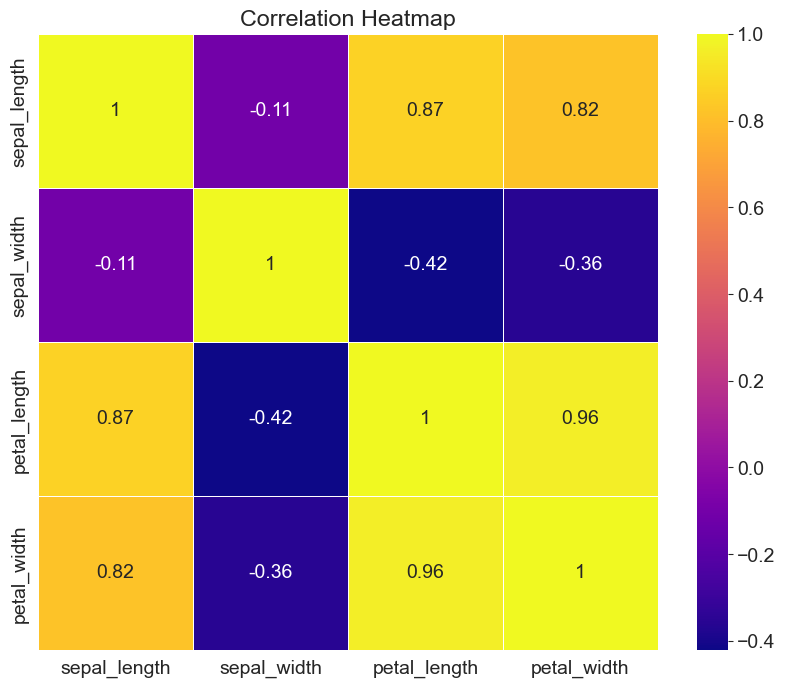

In [20]:
plt.figure(figsize=(10, 8))  
sns.heatmap(iris_df.corr(), annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Split Dataset into Input data and Target data

In [52]:
inputs_data = iris_df[iris_df.columns[:-1]]
target = iris_df['species']

# Lablel encoder of target columns

In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

# Split dataset into train & test dataset

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_data, target, test_size=0.2, random_state=5)


In [62]:
print('shape of x_train', x_train.shape)
print('shape of y_train', y_train.shape)
print('shape of x_test', x_test.shape)
print('shape of y_test', y_test.shape)

shape of x_train (117, 4)
shape of y_train (117,)
shape of x_test (30, 4)
shape of y_test (30,)


# Train the Model kNN Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, p = 1)
clf.fit(x_train,y_train)
     

KNeighborsClassifier(p=1)

# Evalute the model on test datset

In [84]:
y_pred = clf.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

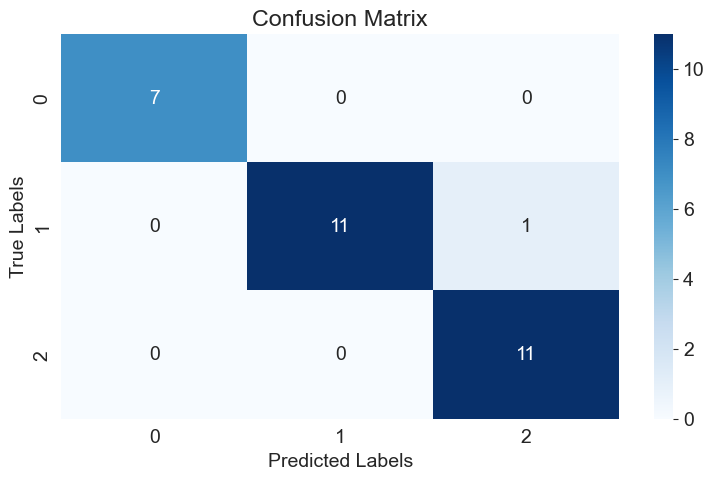

In [86]:

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()
     

# Classification Reports

In [87]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Predict the Species on by using new Inputs

In [104]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    pred = clf.predict(input_df)
    if pred[0] == 0:
        return 'Iris-setosa'
    elif pred[0]==1:
        return 'Iris-versicolor'
    else:
        return 'Iris-virginica'

In [105]:
new_input = {'sepal_length': 6.3,
             'sepal_width': 3.2,
             'petal_length': 4.5,
             'petal_width': 2.00
        }

In [106]:
predict_input(new_input)

'Iris-versicolor'